# Term Deposit Subscrption Prediction Project Work_ Prabhu

## Goal
Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio. 

### Dataset: 
file : bank-full.csv file 

## Attribute information
Input variables:
Bank client data:
1. age: Continuous feature
2. job: Type of job (management, technician, entrepreneur, blue-collar, etc.)
3. marital: marital status (married, single, divorced)
4. education: education level (primary, secondary, tertiary)
5. default: has credit in default?
6. housing: has housing loan?
7. loan: has personal loan?
8. balance in account
Related to previous contact:
9. contact: contact communication type
10. month: last contact month of year
11. day: last contact day of the month
12. duration: last contact duration, in seconds*
Other attributes:
13. campaign: number of contacts performed during this campaign and for this
client
14. pdays: number of days that passed by after the client was last contacted from a
previous campaign (-1 tells us the person has not been contacted or contact
period is beyond 900 days)
15. previous: number of times the client has been contacted before for the last
campaign to subscribe term deposit
16. poutcome: outcome of the previous marketing campaign
Output variable (desired target):
17. Target: Tell us has the client subscribed a term deposit. (Yes, No)

## Deliverable – 1 (Exploratory data quality report reflecting the following) – (20)

1. Univariate analysis (12 marks)
a. Univariate analysis – data types and description of the independent attributes
which should include (name, meaning, range of values observed, central values
(mean and median), standard deviation and quartiles, analysis of the body of
distributions / tails, missing values, outliers.
b. Strategies to address the different data challenges such as data pollution, outlier’s
treatment and missing values treatment.
c. Please provide comments in jupyter notebook regarding the steps you take and
insights drawn from the plots.
2. Multivariate analysis (8 marks)
a. Bi-variate analysis between the predictor variables and target column. Comment
on your findings in terms of their relationship and degree of relation if any.
Visualize the analysis using boxplots and pair plots, histograms or density curves.
Select the most appropriate attributes.
b. Please provide comments in jupyter notebook regarding the steps you take and
insights drawn from the plots

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
%matplotlib inline

#from yellowbrick.classifier import ClassificationReport, ROCAUC

plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....

In [3]:
bank_df = pd.read_csv("bank-full.csv")   # import .csv file
bank_df.head(10)

age           job   marital  education default  balance housing loan  \
0   58    management   married   tertiary      no     2143     yes   no   
1   44    technician    single  secondary      no       29     yes   no   
2   33  entrepreneur   married  secondary      no        2     yes  yes   
3   47   blue-collar   married    unknown      no     1506     yes   no   
4   33       unknown    single    unknown      no        1      no   no   
5   35    management   married   tertiary      no      231     yes   no   
6   28    management    single   tertiary      no      447     yes  yes   
7   42  entrepreneur  divorced   tertiary     yes        2     yes   no   
8   58       retired   married    primary      no      121     yes   no   
9   43    technician    single  secondary      no      593     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no  
5  unknown    5   may       139         1     -1         0  unknown     no  
6  unknown    5   may       217         1     -1         0  unknown     no  
7  unknown    5   may       380         1     -1         0  unknown     no  
8  unknown    5   may        50         1     -1         0  unknown     no  
9  unknown    5   may        55         1     -1         0  unknown     no

In [4]:
bank_df.shape

(45211, 17)

In [5]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
bank_df.isnull().sum()   # check for null values -- There are no Null Values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [7]:
print(bank_df.job.value_counts())
print(bank_df.marital.value_counts())
print(bank_df.education.value_counts())
print(bank_df.default.value_counts())
print(bank_df.housing.value_counts())
print(bank_df.loan.value_counts())
print(bank_df.contact.value_counts())
print(bank_df.month.value_counts())
print(bank_df.poutcome.value_counts())
print(bank_df.Target.value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64
n

In [8]:
bank_df.describe() # Print the descriptive statistics of each & every column using describe() function

age    balance       day  duration  campaign     pdays  previous
count 45,211.00  45,211.00 45,211.00 45,211.00 45,211.00 45,211.00 45,211.00
mean      40.94   1,362.27     15.81    258.16      2.76     40.20      0.58
std       10.62   3,044.77      8.32    257.53      3.10    100.13      2.30
min       18.00  -8,019.00      1.00      0.00      1.00     -1.00      0.00
25%       33.00      72.00      8.00    103.00      1.00     -1.00      0.00
50%       39.00     448.00     16.00    180.00      2.00     -1.00      0.00
75%       48.00   1,428.00     21.00    319.00      3.00     -1.00      0.00
max       95.00 102,127.00     31.00  4,918.00     63.00    871.00    275.00

In [9]:
# Print the descriptive statistics of each & every column using describe() function
# Below shows  1) Balance min has -ve value indicating some accounts have negative credits / owe money to bank
# pdays: number of days that passed by after the client was last contacted from a previous campaign (-1 tells us the person has not been contacted or contact period is beyond 900 days)
# pdays -1 in min, , @ 25% , @50%, @ 75% shows atleast majority of clients have not been contacted beyond 900 days -- they cannot be outliers
# further is analysed by plotting distplot, countplot and box plot

bank_df.describe().transpose()

count     mean      std       min    25%    50%      75%  \
age      45,211.00    40.94    10.62     18.00  33.00  39.00    48.00   
balance  45,211.00 1,362.27 3,044.77 -8,019.00  72.00 448.00 1,428.00   
day      45,211.00    15.81     8.32      1.00   8.00  16.00    21.00   
duration 45,211.00   258.16   257.53      0.00 103.00 180.00   319.00   
campaign 45,211.00     2.76     3.10      1.00   1.00   2.00     3.00   
pdays    45,211.00    40.20   100.13     -1.00  -1.00  -1.00    -1.00   
previous 45,211.00     0.58     2.30      0.00   0.00   0.00     0.00   

                max  
age           95.00  
balance  102,127.00  
day           31.00  
duration   4,918.00  
campaign      63.00  
pdays        871.00  
previous     275.00

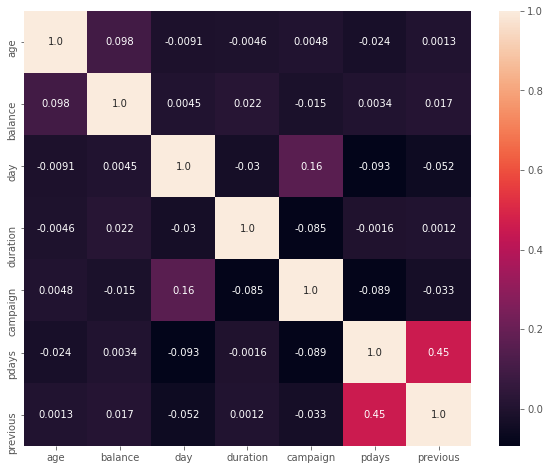

In [10]:
# using correlation methoid to see different correlation between the variables
plt.figure(figsize=(10,8))
sns.heatmap(bank_df.corr(), annot=True, fmt=".2")
plt.show()

## Univariate and Bivariate Analysis

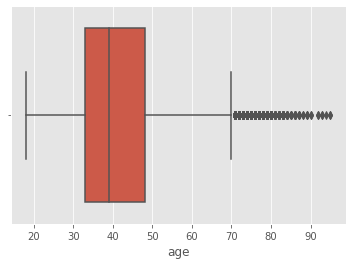

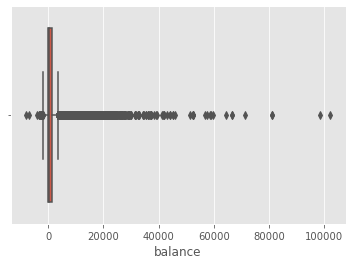

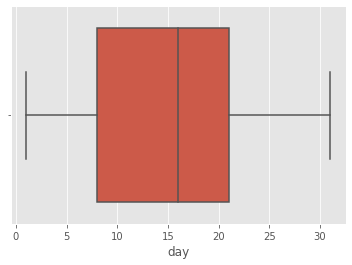

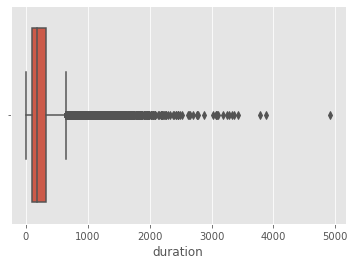

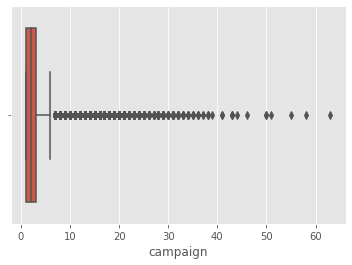

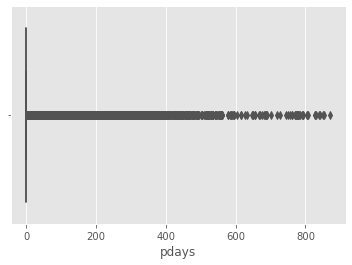

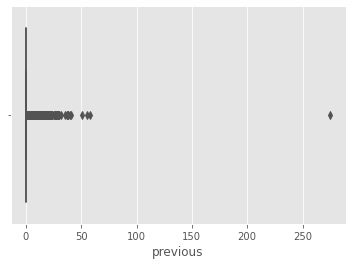

In [11]:
# Checking for Outlier using boxplot for continous columns   
#for i in ['age','job', 'maritial','education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'Target']:
# job,martial, education, default, housing, loan, contact, month, poutcome and Target are objects cannout plot
# below try to remove objects and try boxplot
for i in ['age','balance','day', 'duration', 'campaign', 'pdays', 'previous']:
    sns.boxplot(bank_df[i])
    plt.show()

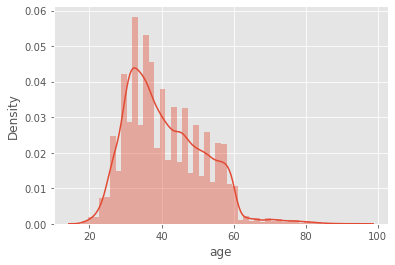

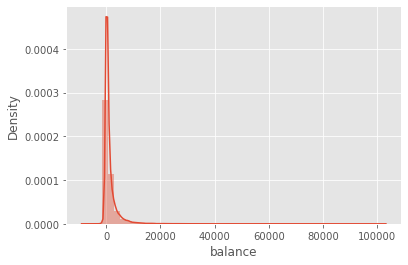

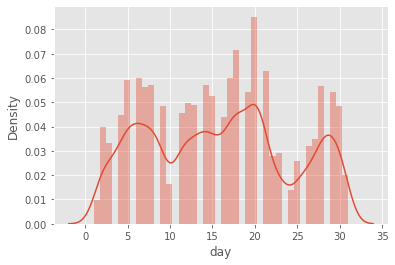

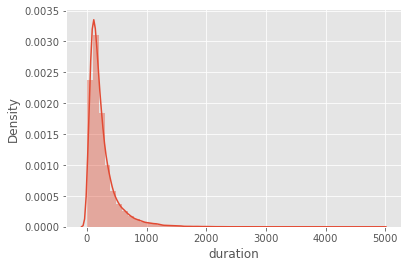

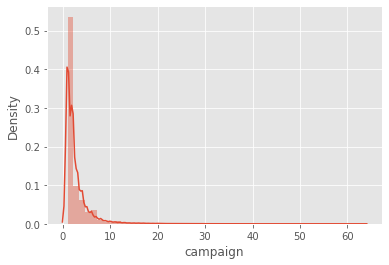

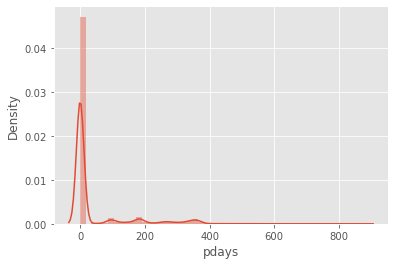

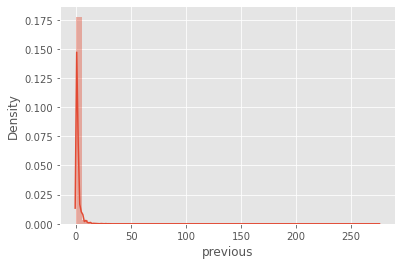

In [12]:
# distplot for continous columns
#for i in ['age','job', 'maritial','education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'Target']:
# job,martial, education, default, housing, loan, contact, month, poutcome and Target are objects cannout plot
# below try to remove objects and try distplot
for i in ['age','balance','day', 'duration', 'campaign', 'pdays', 'previous']:
    sns.distplot(bank_df[i])
    plt.show()

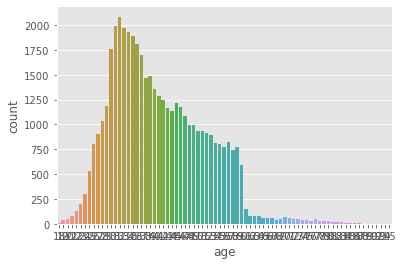

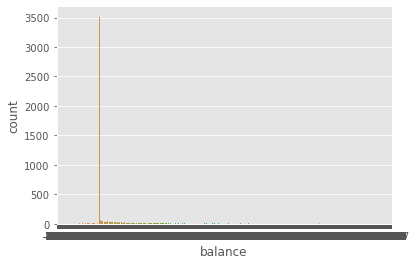

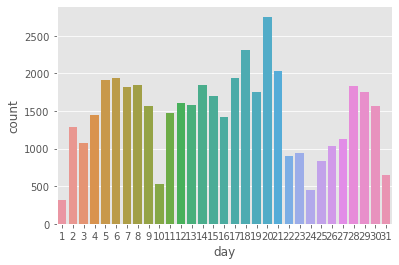

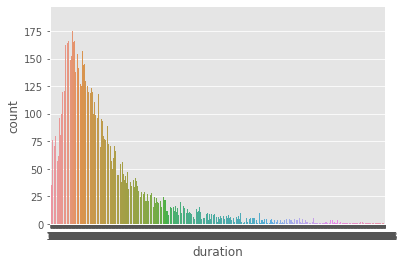

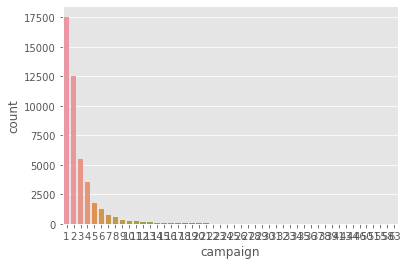

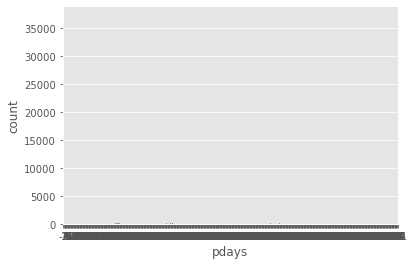

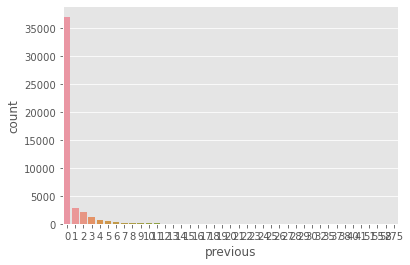

In [13]:
# countplot for continous columns
#for i in ['age','job', 'maritial','education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'Target']:
# job,martial, education, default, housing, loan, contact, month, poutcome and Target are objects cannout plot
# below try to remove objects and try countplot
for i in ['age','balance','day', 'duration', 'campaign', 'pdays', 'previous']:
    sns.countplot(bank_df[i])
    plt.show()

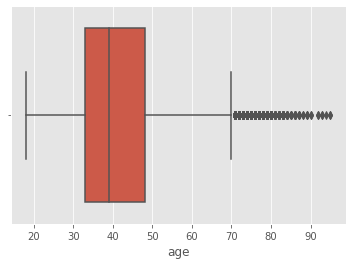

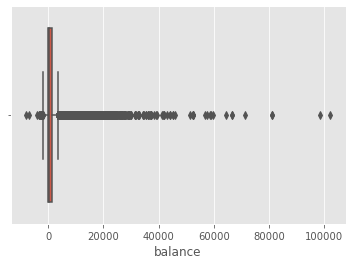

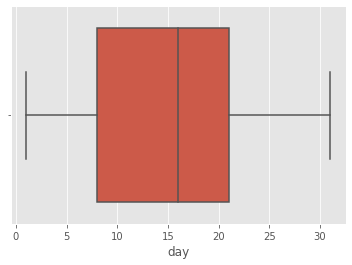

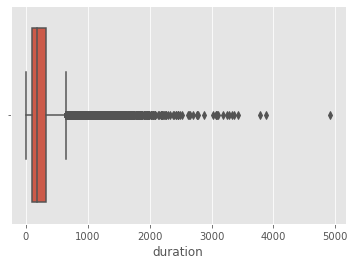

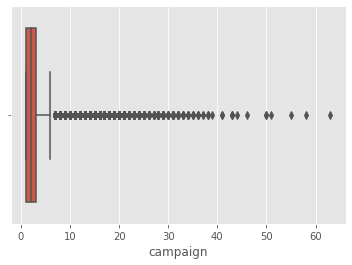

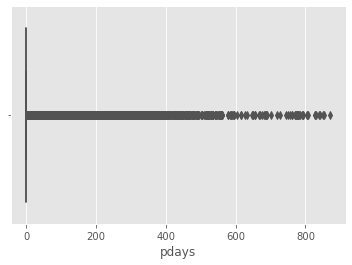

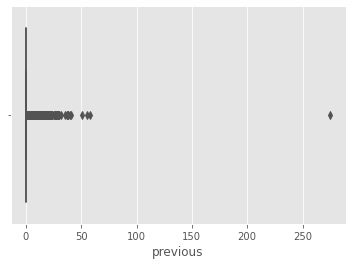

In [14]:
# box for continous columns
#for i in ['age','job', 'maritial','education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'Target']:
# job,martial, education, default, housing, loan, contact, month, poutcome and Target are objects cannot plot
# below try to remove objects and try boxplot
for i in ['age','balance','day', 'duration', 'campaign', 'pdays', 'previous']:
    sns.boxplot(bank_df[i])
    plt.show()

In [15]:
#levels of Y variable
bank_df['duration'].value_counts()

124     188
90      184
89      177
122     175
104     175
       ... 
2150      1
1970      1
1906      1
1842      1
2015      1
Name: duration, Length: 1573, dtype: int64

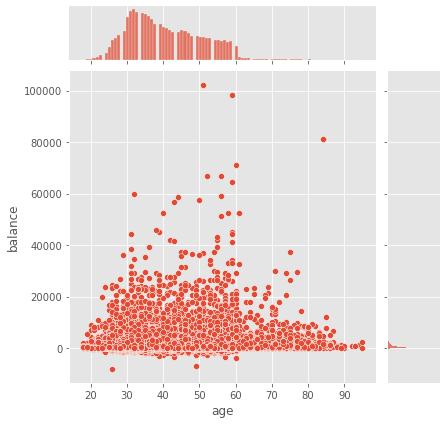

In [16]:
sns.jointplot(bank_df['age'], bank_df['balance']); # Below plot also shows there are few -ve balances

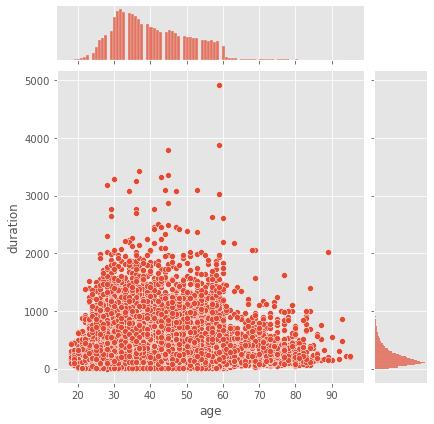

In [17]:
sns.jointplot(bank_df['age'], bank_df['duration']);

In [18]:
bank_df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no

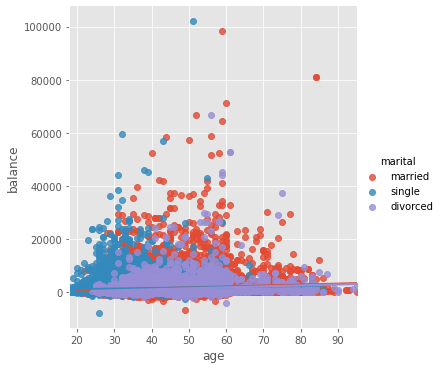

In [19]:
sns.lmplot(x="age", y="balance", hue="marital", data=bank_df); # just analyze balance wrt to marital status

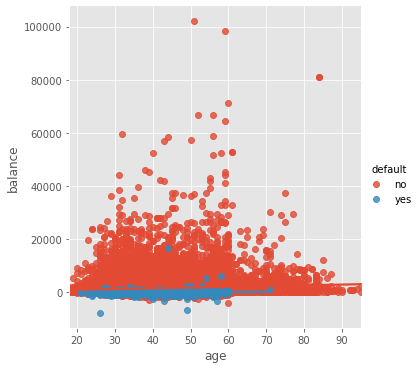

In [20]:
sns.lmplot(x="age", y="balance", hue="default", data=bank_df); # just analyze balance - age and defaulter pattern

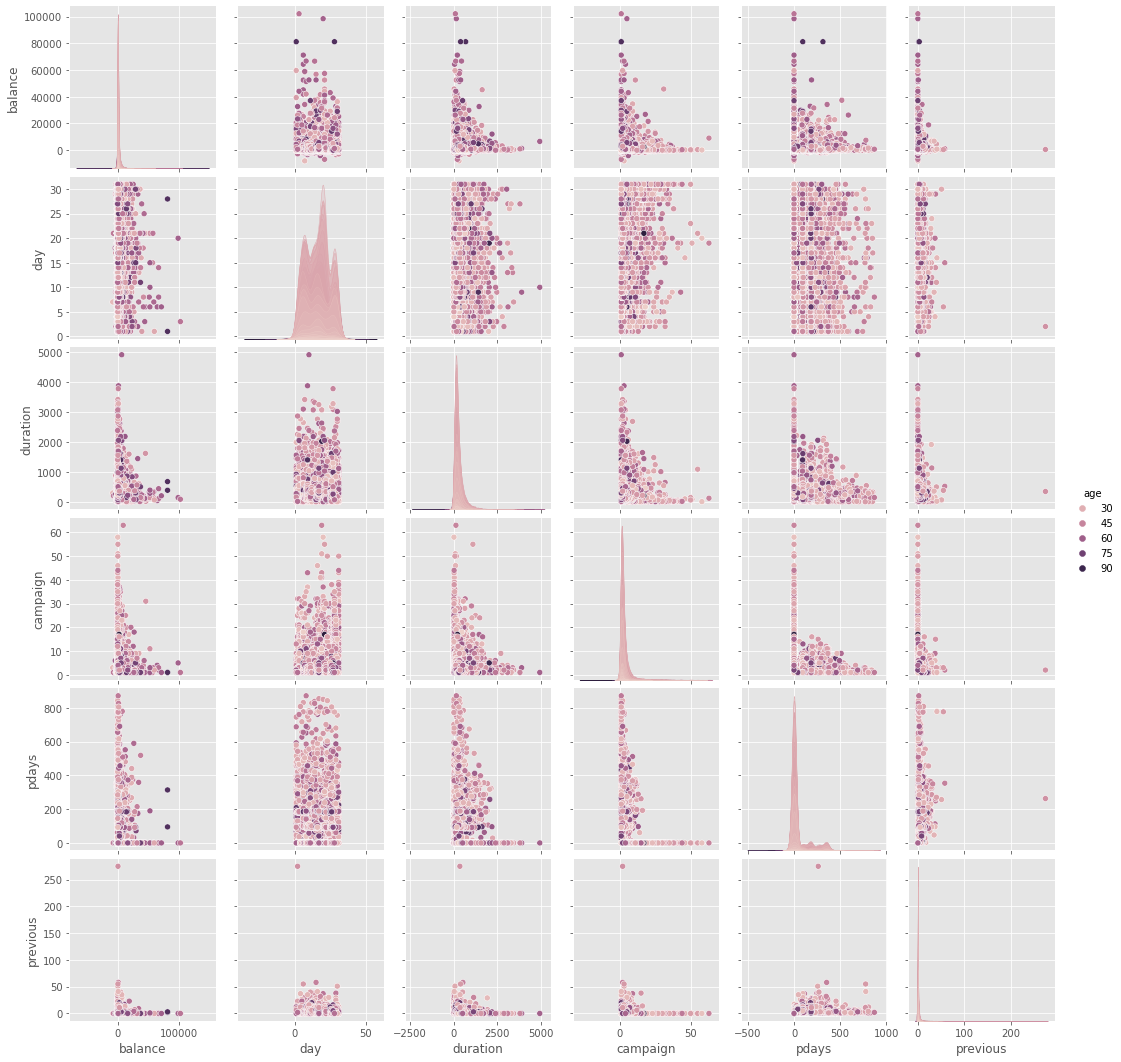

In [21]:
sns.pairplot(bank_df, hue = 'age')  # pair plot to verify w.r.t to "age"

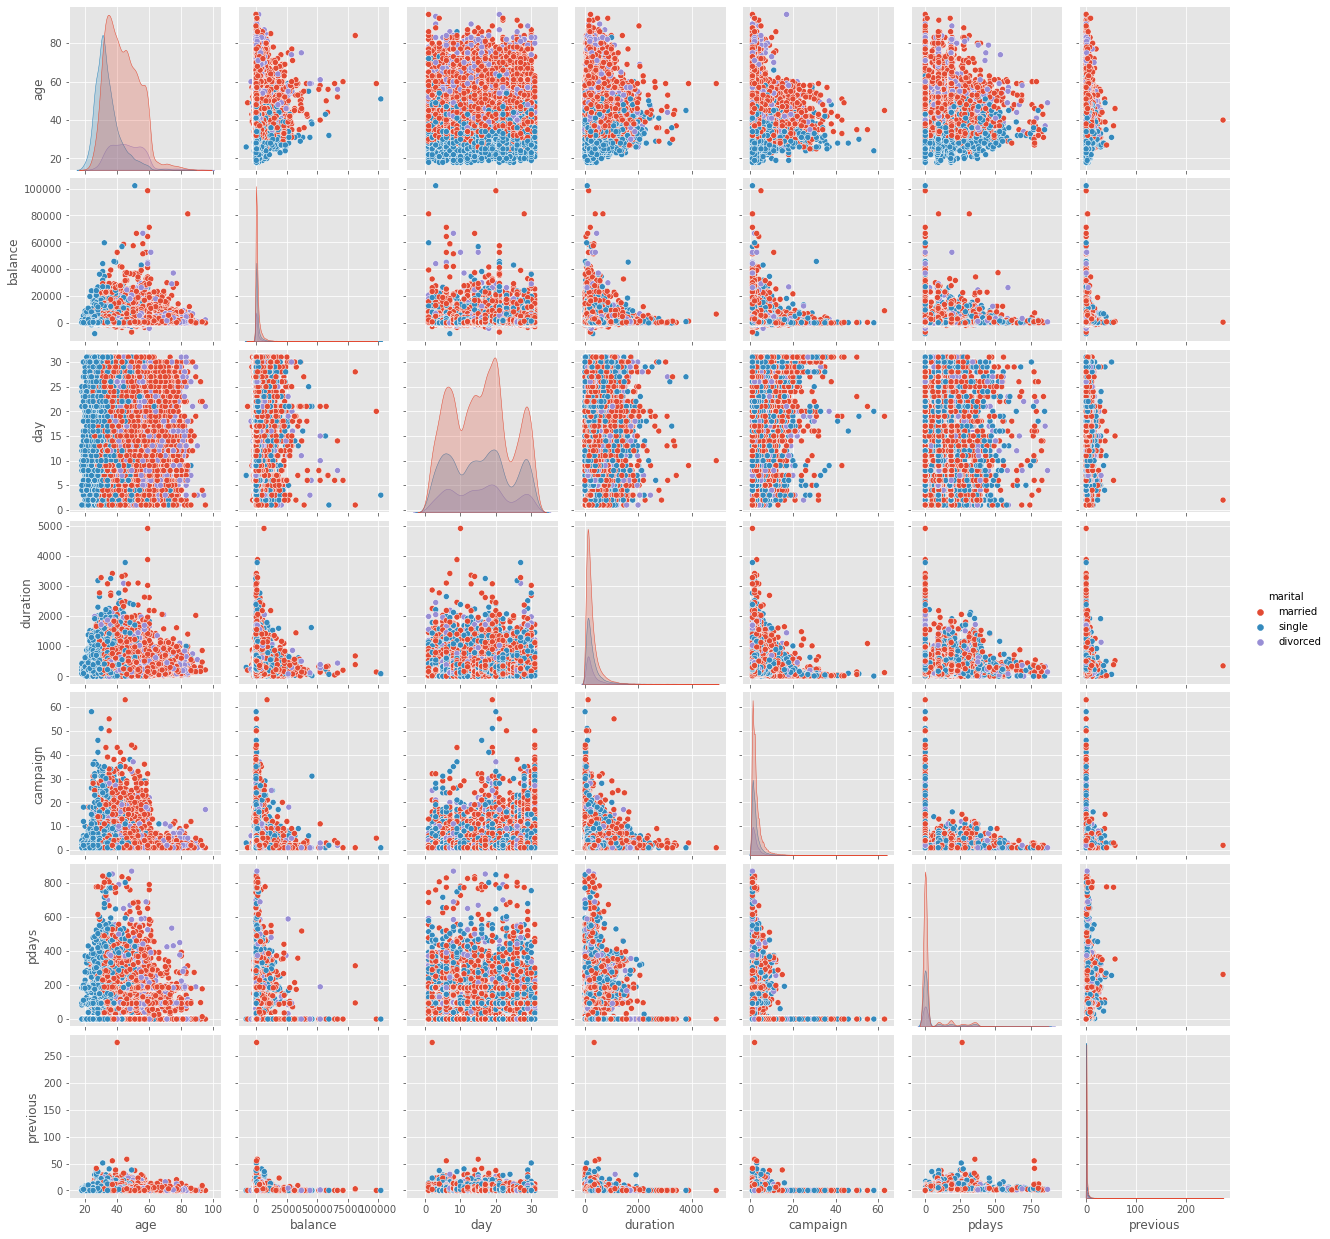

In [22]:
sns.pairplot(bank_df, hue = 'marital')  # pair plot to verify w.r.t to "maritial" status

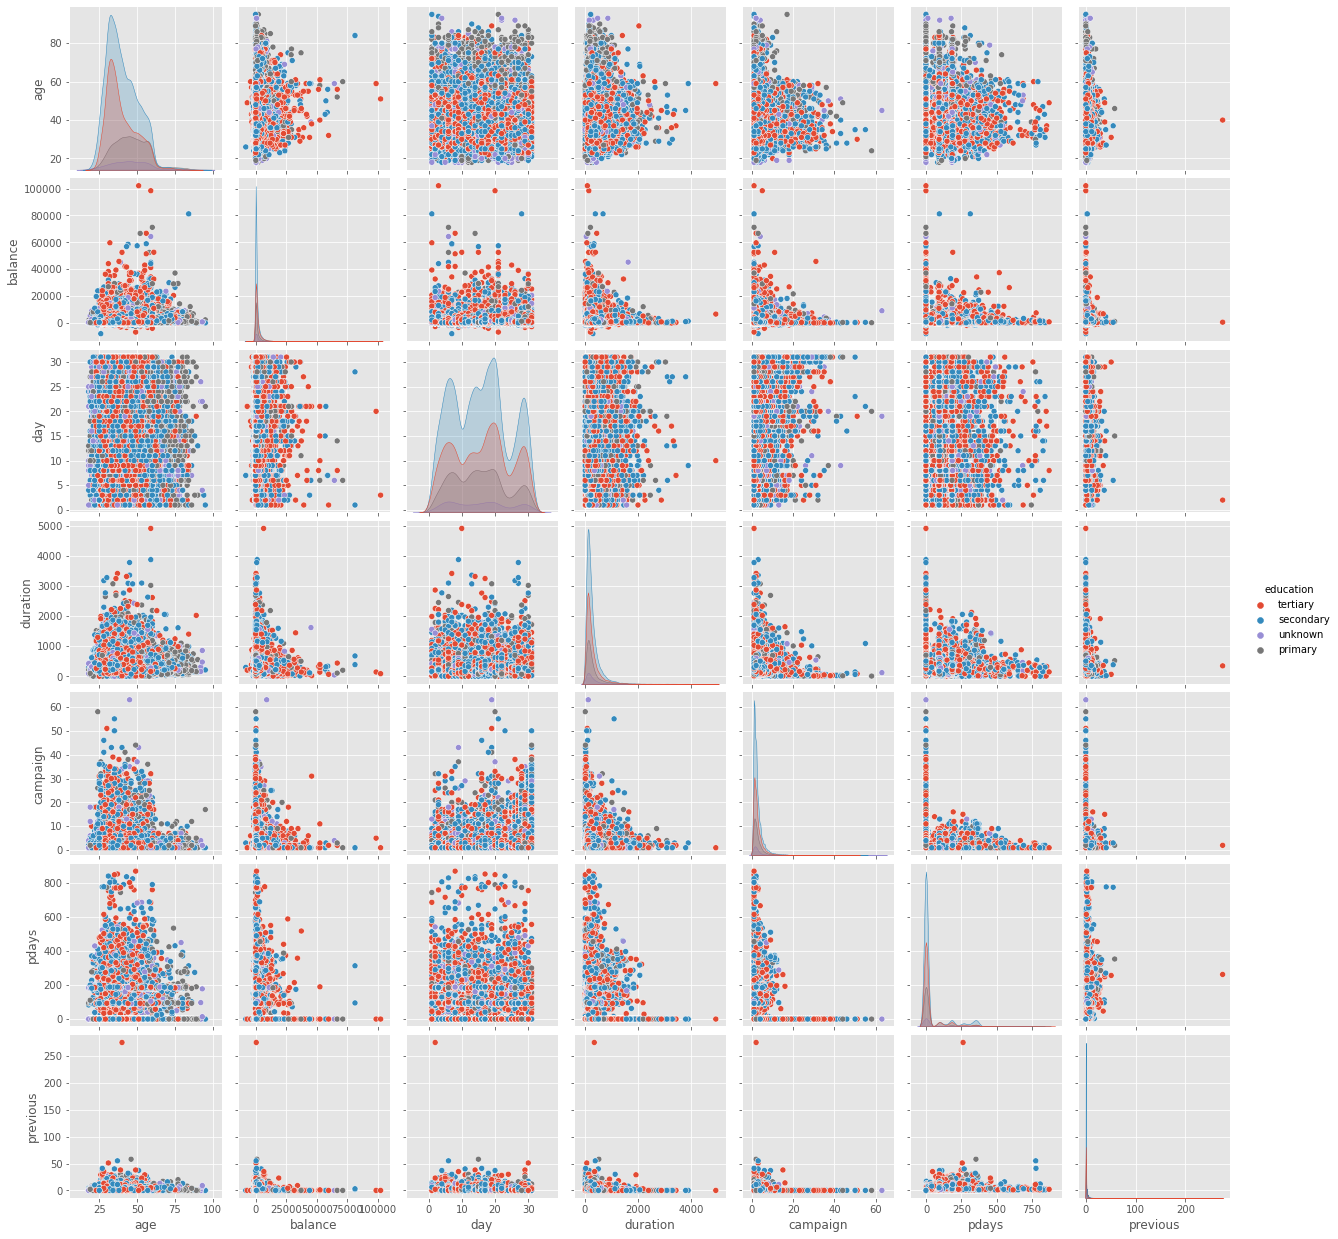

In [23]:
sns.pairplot(bank_df, hue = 'education') # pair plot to verify w.r.t to "education"

## Prepare Data for Model

In [24]:
bank_df.head(10)

age           job   marital  education default  balance housing loan  \
0   58    management   married   tertiary      no     2143     yes   no   
1   44    technician    single  secondary      no       29     yes   no   
2   33  entrepreneur   married  secondary      no        2     yes  yes   
3   47   blue-collar   married    unknown      no     1506     yes   no   
4   33       unknown    single    unknown      no        1      no   no   
5   35    management   married   tertiary      no      231     yes   no   
6   28    management    single   tertiary      no      447     yes  yes   
7   42  entrepreneur  divorced   tertiary     yes        2     yes   no   
8   58       retired   married    primary      no      121     yes   no   
9   43    technician    single  secondary      no      593     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no  
5  unknown    5   may       139         1     -1         0  unknown     no  
6  unknown    5   may       217         1     -1         0  unknown     no  
7  unknown    5   may       380         1     -1         0  unknown     no  
8  unknown    5   may        50         1     -1         0  unknown     no  
9  unknown    5   may        55         1     -1         0  unknown     no

In [25]:
# convert all objects into categorical and replace with dummies with onehot coding where necessary -- integers
 
replaceStruct = {  
                "default":     {"no": 0, "yes":1},
                 "housing":     {"no": 0, "yes": 1 }, 
                 "loan":     {"no": 0, "yes": 1 }, 
                "Target": {"no":0,"yes": 1 }
                }
oneHotCols=["job","marital","education","contact","month", "poutcome"]

In [26]:
bank_df=bank_df.replace(replaceStruct) # convert all objects into categorical and replace with dummies with onehot coding where necessary -- integers
bank_df=pd.get_dummies(bank_df, columns=oneHotCols)
bank_df.head(10)

age  default  balance  housing  loan  day  duration  campaign  pdays  \
0   58        0     2143        1     0    5       261         1     -1   
1   44        0       29        1     0    5       151         1     -1   
2   33        0        2        1     1    5        76         1     -1   
3   47        0     1506        1     0    5        92         1     -1   
4   33        0        1        0     0    5       198         1     -1   
5   35        0      231        1     0    5       139         1     -1   
6   28        0      447        1     1    5       217         1     -1   
7   42        1        2        1     0    5       380         1     -1   
8   58        0      121        1     0    5        50         1     -1   
9   43        0      593        1     0    5        55         1     -1   

   previous  ...  month_jun  month_mar  month_may  month_nov  month_oct  \
0         0  ...          0          0          1          0          0   
1         0  ...          0          0          1          0          0   
2         0  ...          0          0          1          0          0   
3         0  ...          0          0          1          0          0   
4         0  ...          0          0          1          0          0   
5         0  ...          0          0          1          0          0   
6         0  ...          0          0          1          0          0   
7         0  ...          0          0          1          0          0   
8         0  ...          0          0          1          0          0   
9         0  ...          0          0          1          0          0   

   month_sep  poutcome_failure  poutcome_other  poutcome_success  \
0          0                 0               0                 0   
1          0                 0               0                 0   
2          0                 0               0                 0   
3          0                 0               0                 0   
4          0                 0               0                 0   
5          0                 0               0                 0   
6          0                 0               0                 0   
7          0                 0               0                 0   
8          0                 0               0                 0   
9          0                 0               0                 0   

   poutcome_unknown  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  
5                 1  
6                 1  
7                 1  
8                 1  
9                 1  

[10 rows x 49 columns]

In [27]:
bank_df.info() # to checking all objects / categorical columns converted into int64 or uint8

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  Target               45211 non-null  int64
 11  job_admin.           45211 non-null  uint8
 12  job_blue-collar      45211 non-null  uint8
 13  job_entrepreneur     45211 non-null  uint8
 14  job_housemaid        45211 non-null  uint8
 15  job_management       45211 non-null  uint8
 16  job_retired          4

##
1. Ensure the attribute types are correct. If not, take appropriate actions.
2. Get the data model ready.
3. Transform the data i.e. scale / normalize if required
4. Create the training set and test set in ratio of 70:30

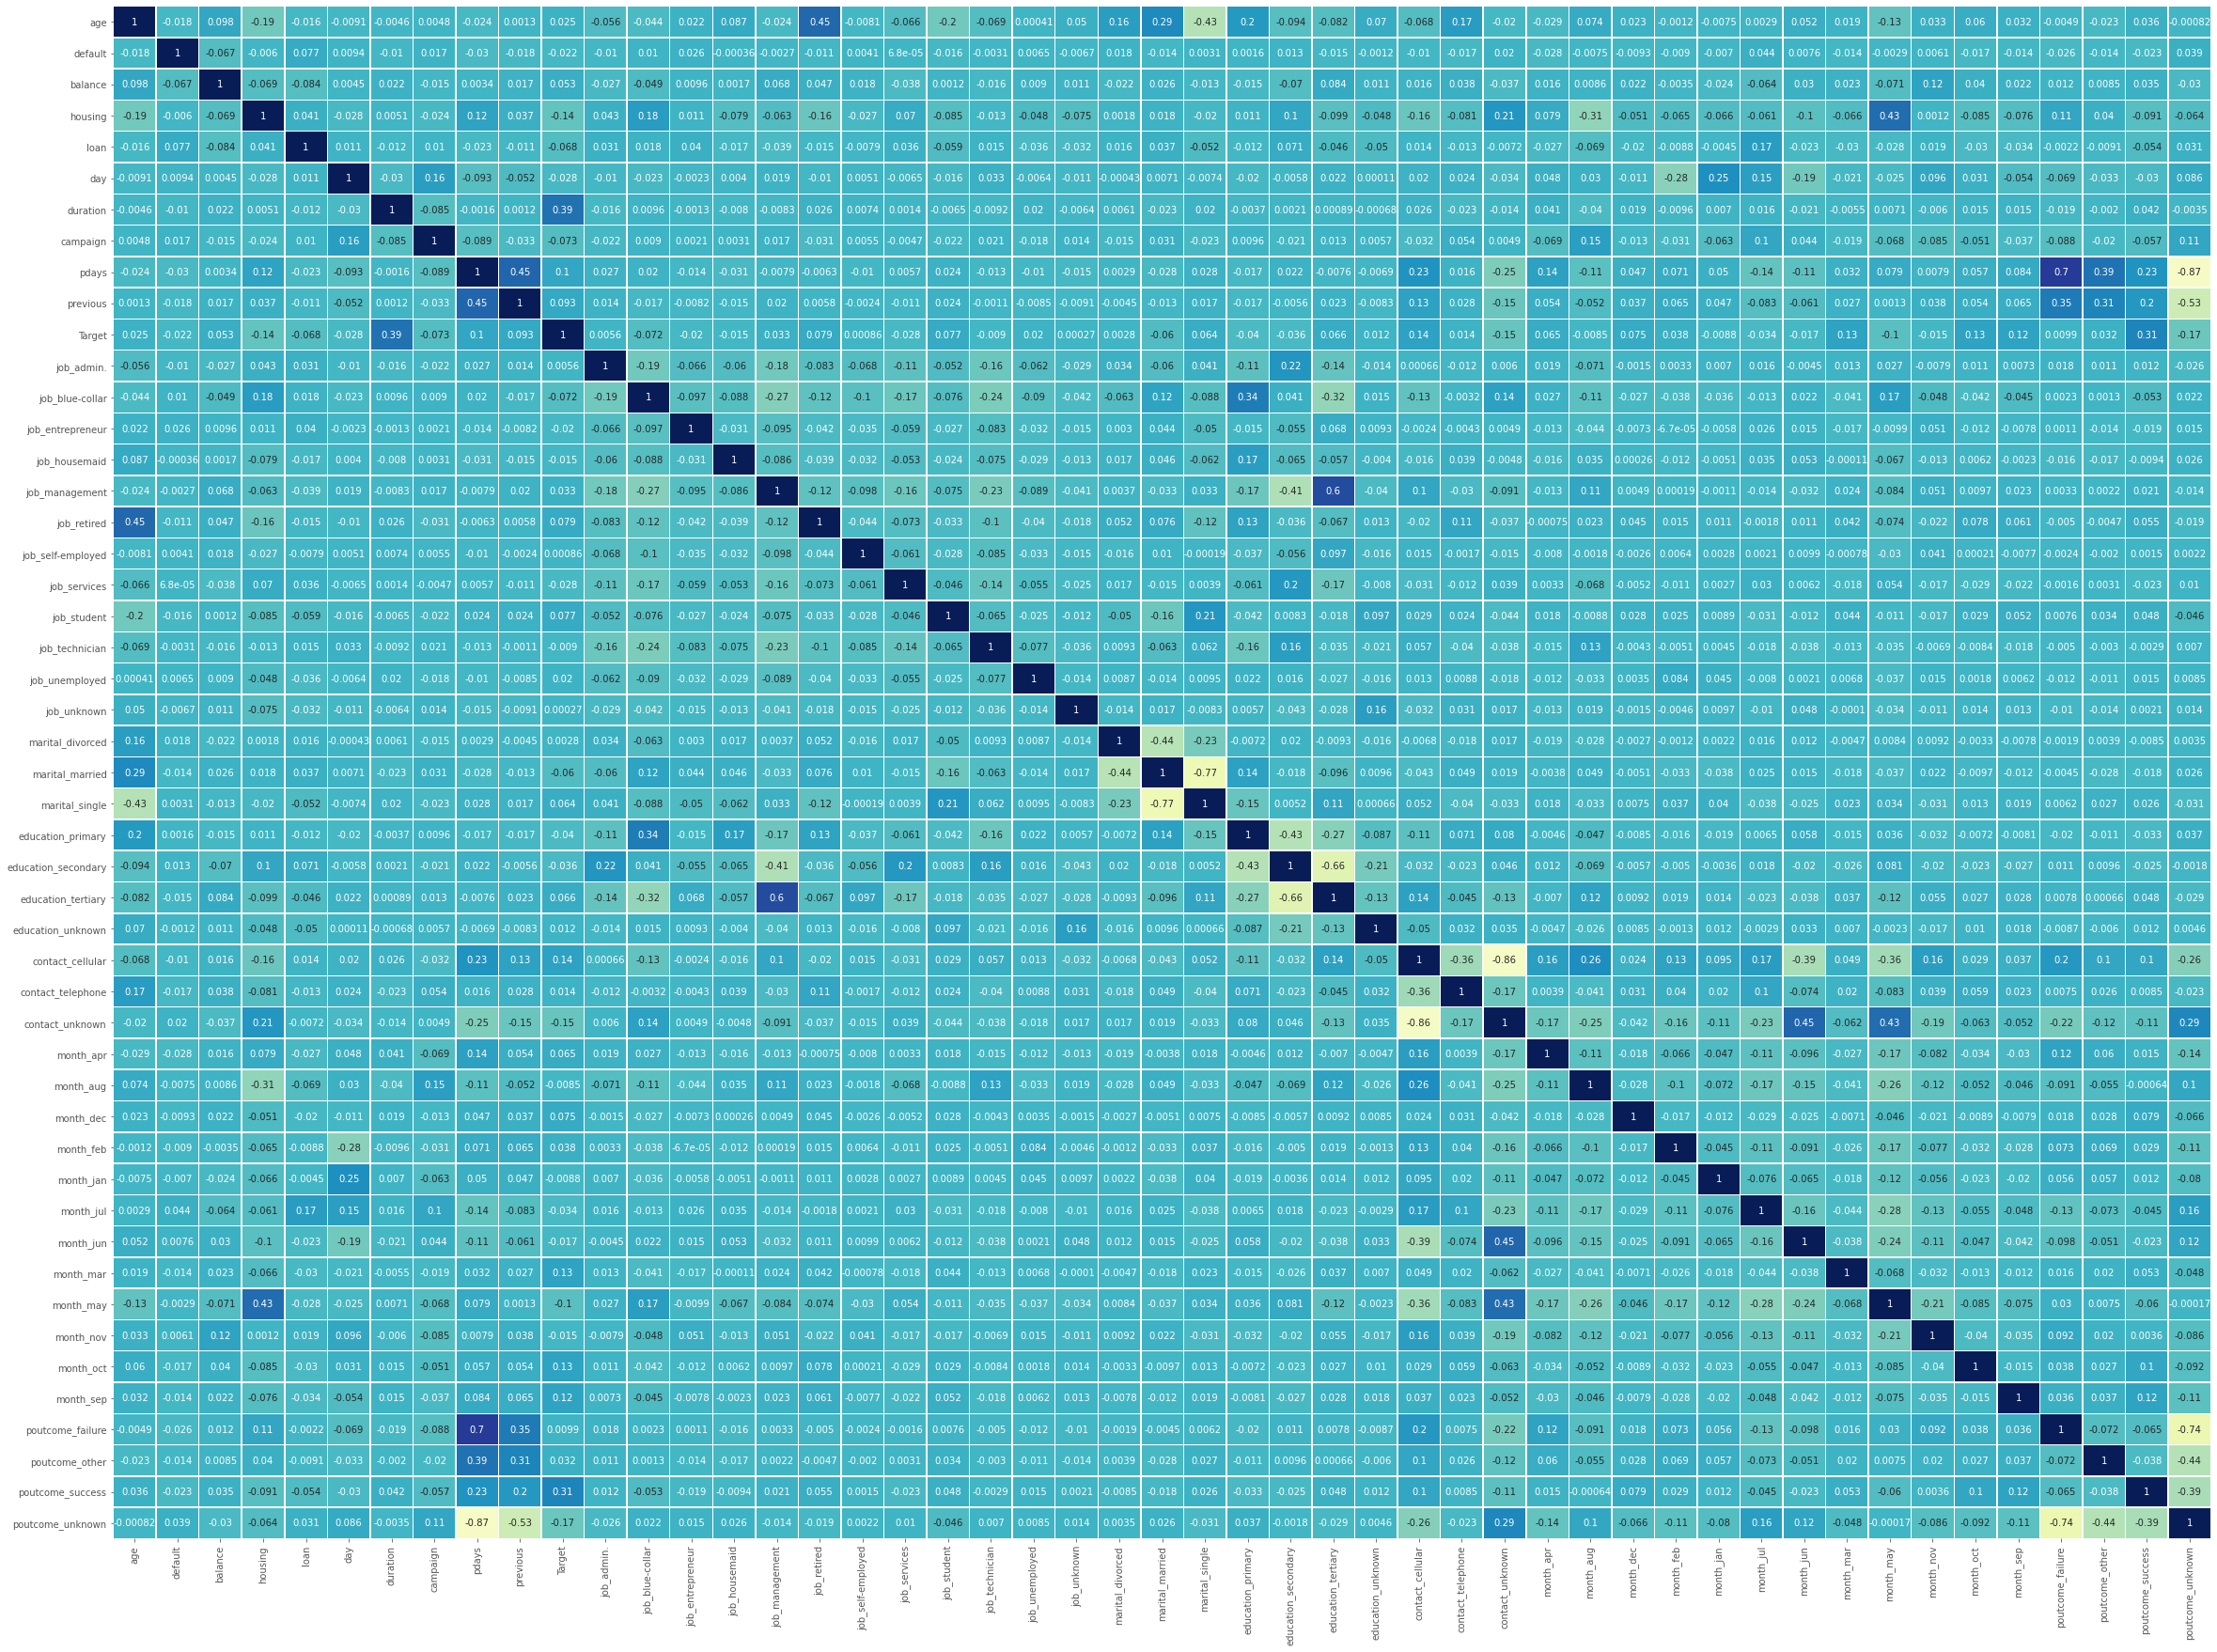

In [28]:
plt.figure(figsize=(40,30))

sns.heatmap(bank_df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

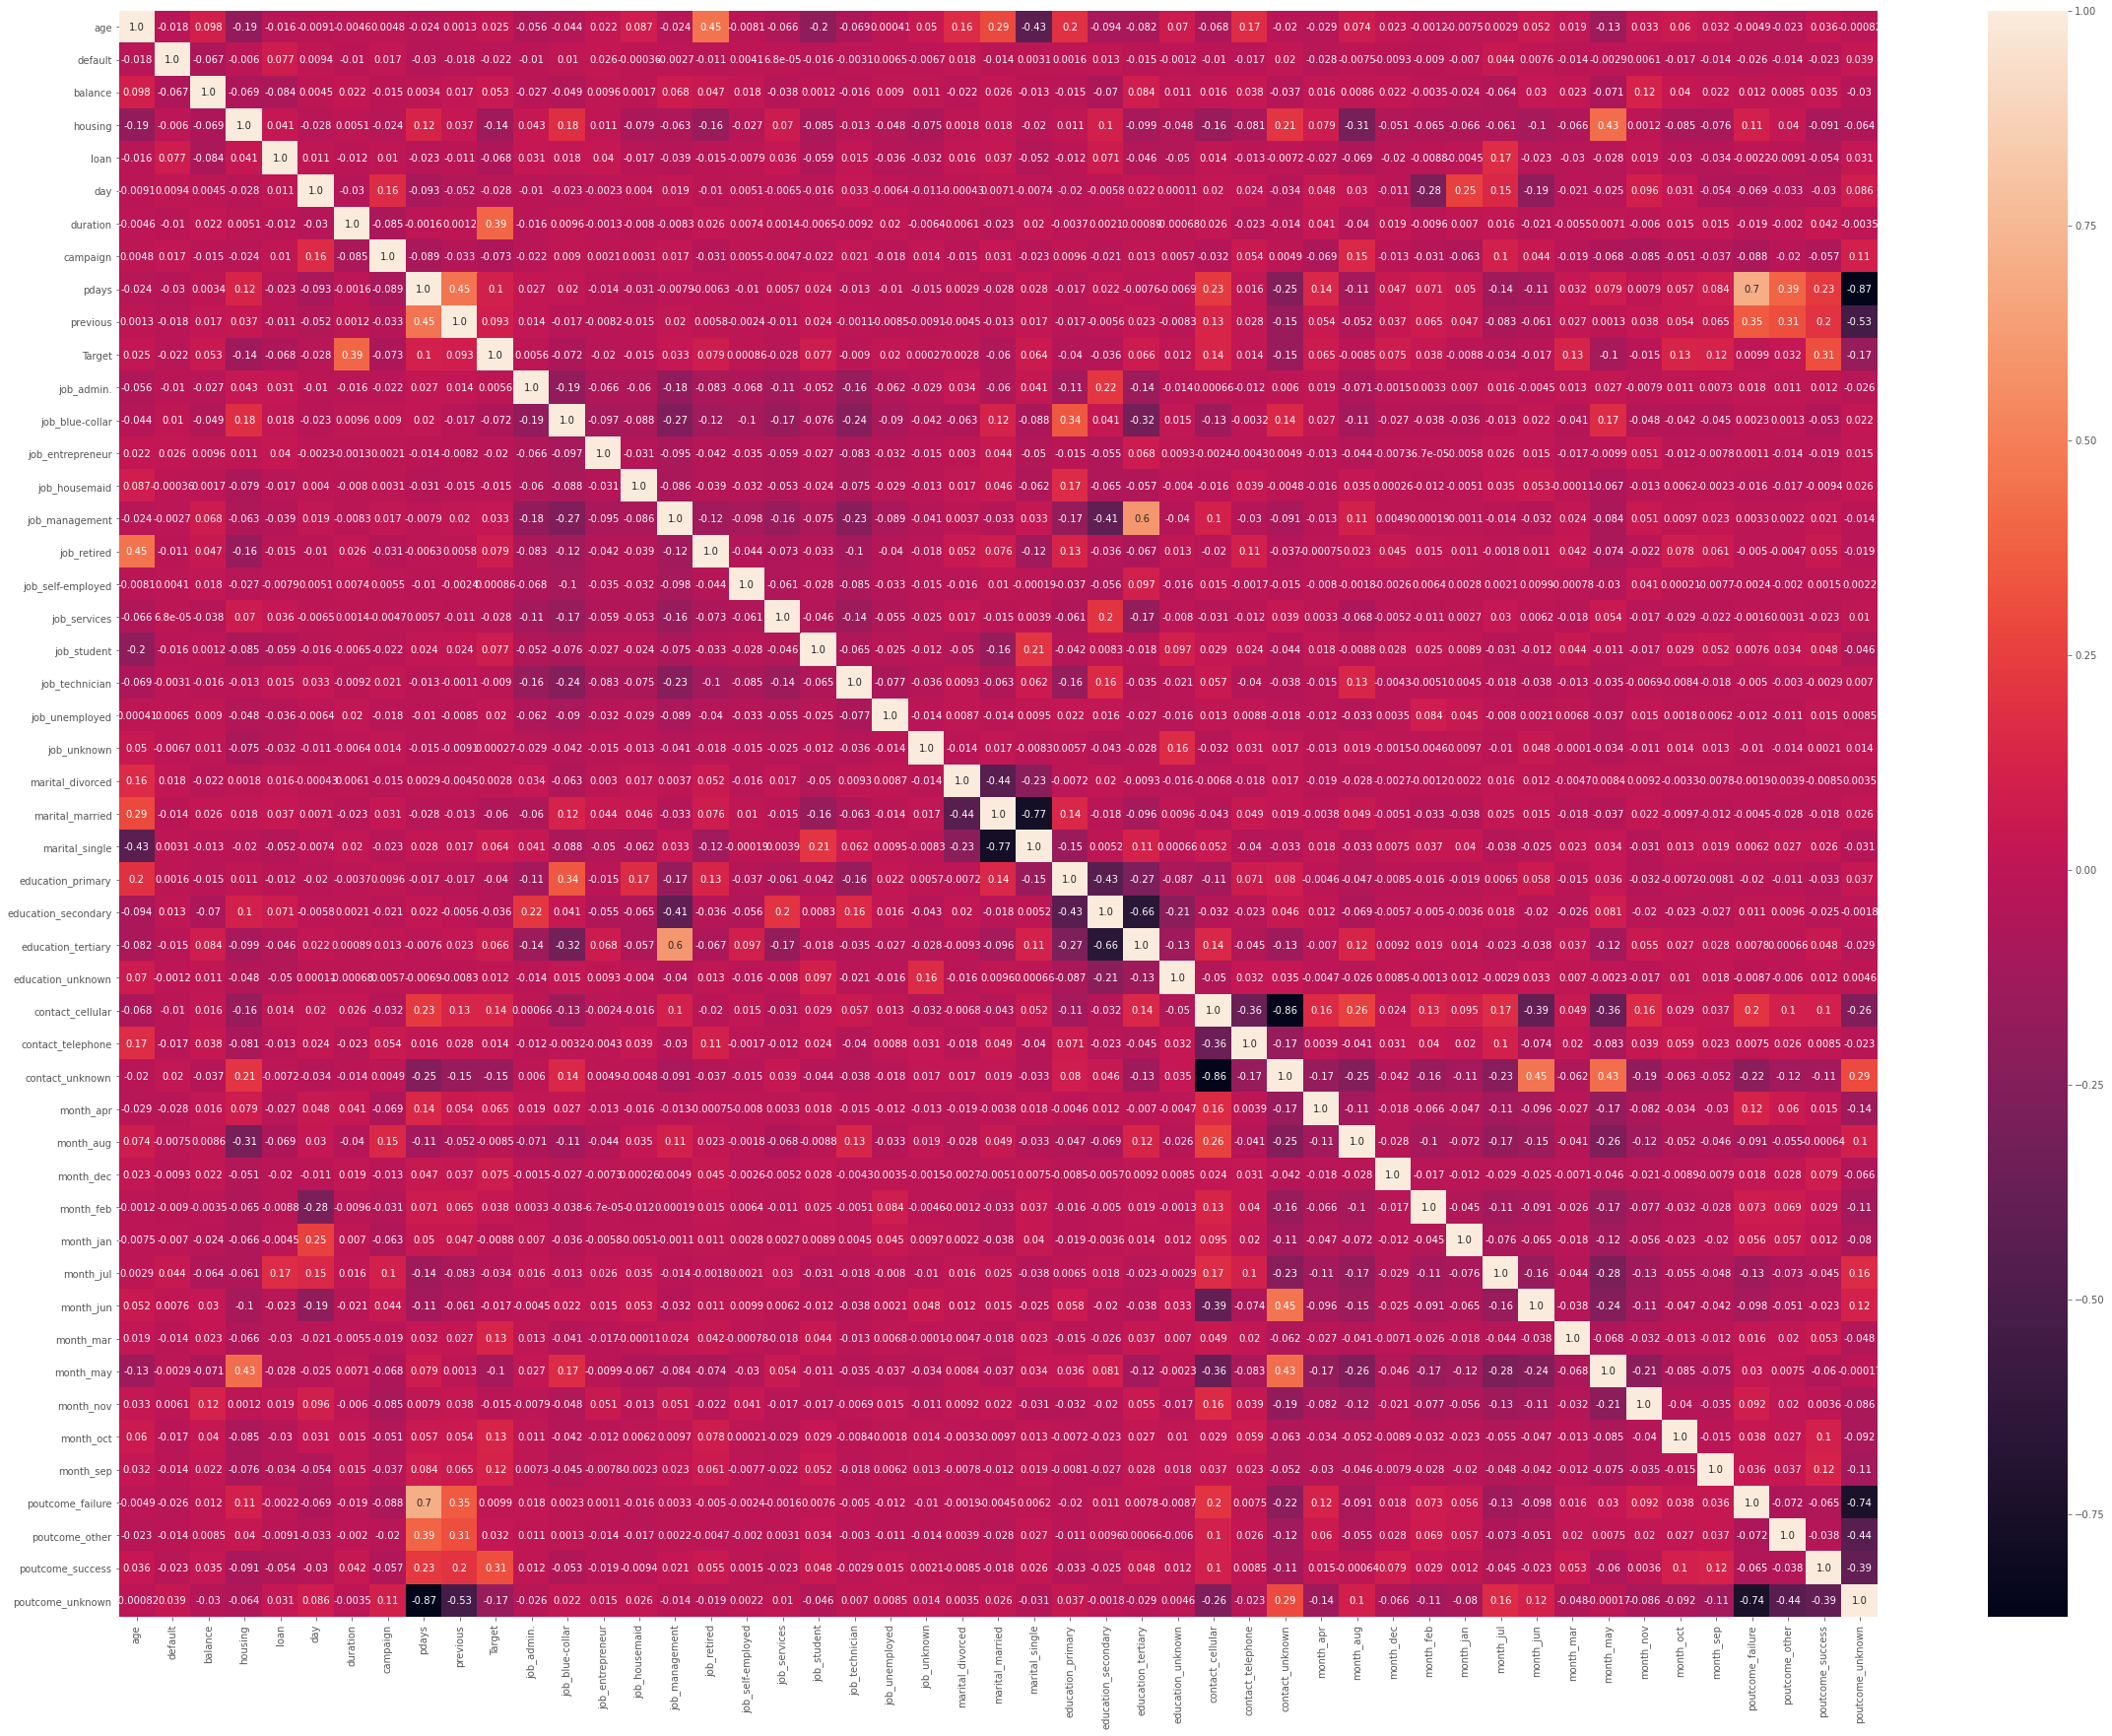

In [29]:
# using correlation methoid to see different correlation between the variables
plt.figure(figsize=(40,30))
sns.heatmap(bank_df.corr(), annot=True, fmt=".2")
plt.show()

In [30]:
bank_df.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'Target', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [31]:
# to look at the target variable "Target" to understand how the data is distributed amongst the varous 
bank_df.groupby(["Target"]).mean()

age  default  balance  housing  loan   day  duration  campaign  \
Target                                                                    
0      40.84     0.02 1,303.71     0.58  0.17 15.89    221.18      2.85   
1      41.67     0.01 1,804.27     0.37  0.09 15.16    537.29      2.14   

        pdays  previous  ...  month_jun  month_mar  month_may  month_nov  \
Target                   ...                                               
0       36.42      0.50  ...       0.12       0.01       0.32       0.09   
1       68.70      1.17  ...       0.10       0.05       0.17       0.08   

        month_oct  month_sep  poutcome_failure  poutcome_other  \
Target                                                           
0            0.01       0.01              0.11            0.04   
1            0.06       0.05              0.12            0.06   

        poutcome_success  poutcome_unknown  
Target                                      
0                   0.01              0.84  
1                   0.18              0.64  

[2 rows x 48 columns]

In [32]:
# to look at the target variable "loan" to understand how the data is distributed amongst the varous 
bank_df.groupby(["loan"]).mean()

age  default  balance  housing   day  duration  campaign  pdays  \
loan                                                                     
0    41.01     0.01 1,474.45     0.55 15.77    259.56      2.75  41.19   
1    40.56     0.04   774.31     0.60 16.02    250.85      2.83  34.98   

      previous  Target  ...  month_jun  month_mar  month_may  month_nov  \
loan                    ...                                               
0         0.59    0.13  ...       0.12       0.01       0.31       0.09   
1         0.52    0.07  ...       0.10       0.00       0.28       0.10   

      month_oct  month_sep  poutcome_failure  poutcome_other  \
loan                                                           
0          0.02       0.01              0.11            0.04   
1          0.01       0.00              0.11            0.04   

      poutcome_success  poutcome_unknown  
loan                                      
0                 0.04              0.81  
1                 0.01              0.85  

[2 rows x 48 columns]

In [33]:
# to look at the target variable "default" to understand how the data is distributed amongst the varous 
bank_df.groupby(["default"]).mean()

age  balance  housing  loan   day  duration  campaign  pdays  \
default                                                                  
0       40.96 1,389.81     0.56  0.16 15.80    258.51      2.76  40.60   
1       39.53  -137.62     0.53  0.37 16.39    239.12      3.15  18.04   

         previous  Target  ...  month_jun  month_mar  month_may  month_nov  \
default                    ...                                               
0            0.59    0.12  ...       0.12       0.01       0.30       0.09   
1            0.27    0.06  ...       0.14       0.00       0.29       0.10   

         month_oct  month_sep  poutcome_failure  poutcome_other  \
default                                                           
0             0.02       0.01              0.11            0.04   
1             0.00       0.00              0.05            0.02   

         poutcome_success  poutcome_unknown  
default                                      
0                    0.03              0.82  
1                    0.00              0.93  

[2 rows x 48 columns]

## Deliverable – 3 (create the ensemble model) – (30)


1. First create models using Logistic Regression and Decision Tree algorithm. Note the
model performance by using different matrices. Use confusion matrix to evaluate
class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1 score of the
model. (10 marks)
2. Build the ensemble models (Bagging and Boosting) and note the model performance
by using different matrices. Use same metrics as in above model. (at least 3
algorithms) (15 marks)
Proprietary content. ©Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited
3. Make a DataFrame to compare models and their metrics. Give conclusion regarding
the best algorithm and your reason behind it. (5 marks)


In [34]:
## Define X and Y variables
X=bank_df.drop('default', axis=1)
Y=bank_df[['default']]

In [35]:
#Split into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state=7)

In [36]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=7)
logreg.fit(X_train, y_train)                    # fit the model on train data

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
y_predict = logreg.predict(X_test)              # Predicting the target variable on test data

In [38]:
# Observe the predicted and observed classes in a dataframe.

z = X_test.copy()
z['Observed'] = y_test
z['Predicted'] = y_predict
z.head()

age  balance  housing  loan  day  duration  campaign  pdays  previous  \
33177   36      349        1     0   20       365         1     -1         0   
1544    33      177        0     0    8        75         4     -1         0   
44480   79      631        0     0    9       440         5    182         3   
17886   26      -42        0     1   30       305         3     -1         0   
12505   30        0        0     1    2        95         3     -1         0   

       Target  ...  month_may  month_nov  month_oct  month_sep  \
33177       0  ...          0          0          0          0   
1544        0  ...          1          0          0          0   
44480       0  ...          0          0          0          0   
17886       0  ...          0          0          0          0   
12505       0  ...          0          0          0          0   

       poutcome_failure  poutcome_other  poutcome_success  poutcome_unknown  \
33177                 0               0                 0                 1   
1544                  0               0                 0                 1   
44480                 1               0                 0                 0   
17886                 0               0                 0                 1   
12505                 0               0                 0                 1   

       Observed  Predicted  
33177         0          0  
1544          0          0  
44480         0          0  
17886         1          0  
12505         1          0  

[5 rows x 50 columns]

In [39]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Training accuracy 0.9813568426707113

Testing accuracy 0.982158655263934

Confusion Matrix


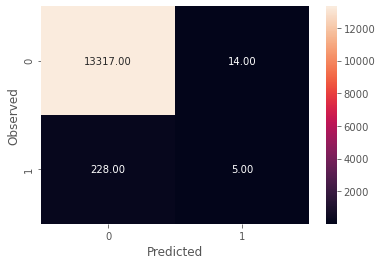

None

Recall: 0.02145922746781116

Precision: 0.2631578947368421

F1 Score: 0.03968253968253968

Roc Auc Score: 0.5102045218428246


In [40]:
print("Training accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

### The confusion matrix  = [[13317, 14], [ 228, 5]]
### TP = 13317 FP = 14 FN = 228 TN = 5


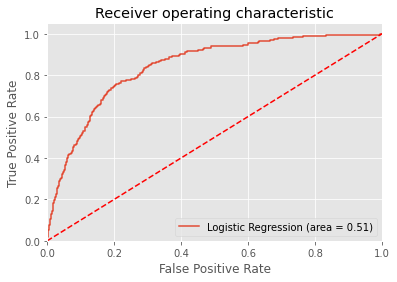

In [41]:
# !pip install yellowbrick  _ #AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [42]:
# Checking Parameters of logistic regression
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 7,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [43]:
# Running a loop to check different values of 'solver'
# all solver can be used with l2, only 'liblinear' and 'saga' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', C = 0.75,solver=i)  # changing values of solver
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.981, 0.981, 0.981, 0.974, 0.97]

[0.982, 0.982, 0.982, 0.974, 0.97]


In [44]:
train_score=[]
test_score=[]
solver = ['liblinear','saga']   # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l1', C = 0.75,solver=i)  #changed penalty to 'l1'
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['liblinear', 'saga']

[0.981, 0.97]

[0.982, 0.97]


In [45]:
model = LogisticRegression(random_state=42,penalty='l1',solver='liblinear',class_weight='balanced') # changing class weight to balanced

model.fit(X_train, y_train) 

y_predict = model.predict(X_test)     

print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))

Trainig accuracy 0.7421240559926692

Testing accuracy 0.7359186080802124


In [46]:
# Running a loop to check different values of 'C'

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear',class_weight='balanced', C=i)  # changing values of C
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.724, 0.744, 0.743, 0.743, 0.742, 0.742]

[0.718, 0.737, 0.736, 0.736, 0.736, 0.736]


Training accuracy 0.7425032388536038

Testing accuracy 0.7358448835151873

Confusion Matrix


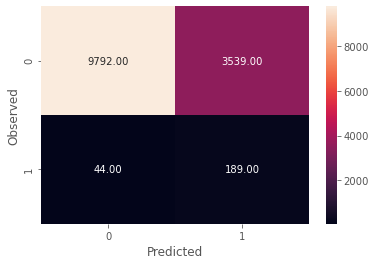

None

Recall: 0.8111587982832618

Precision: 0.05069742489270386

F1 Score: 0.09543044685685431

Roc Auc Score: 0.7728436703890992


In [47]:
#Therefore final model is
model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear', class_weight='balanced',C=0.5) 
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("Training accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

### The confusion matrix = [[9792, 3539], [ 44, 189]]
### TP = 9792 FP = 3539 FN = 44 TN = 189

In [48]:
from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library              ----- tried but did not work!!!  ?? 
viz = ClassificationReport(model)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(model)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

ModuleNotFoundError: No module named 'yellowbrick'

In [49]:
import warnings
warnings.filterwarnings('ignore')

In [50]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split

import numpy as np
import os,sys
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [52]:
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm #Build the logistic regression model

logit = sm.Logit(y_train, sm.add_constant(X_train))
lg = logit.fit()

         Current function value: 0.071255
         Iterations: 35


In [53]:
from scipy import stats #Summary of logistic regression
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31604
Method:                           MLE   Df Model:                           42
Date:                Fri, 09 Oct 2020   Pseudo R-squ.:                  0.2230
Time:                        22:58:03   Log-Likelihood:                -2255.0
converged:                      False   LL-Null:                       -2902.2
Covariance Type:            nonrobust   LLR p-value:                5.681e-244
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.9449        nan        nan        nan         nan         nan
age                    -0.0183      0.006     -3.202      0.001      -0.030      -0.007
balance         

In [54]:
#Calculate Odds Ratio, probability ##create a data frame to collate Odds ratio, probability and p-value of the coef
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format

In [55]:
# FIlter by significant p-value (pval <0.1) and sort descending by Odds ratio
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
pval_filter = lgcoef['pval']<=0.1
lgcoef[pval_filter]

coef  Odds_ratio  probability  pval
loan     0.50        1.64         0.62  0.00
pdays    0.00        1.00         0.50  0.07
balance -0.00        1.00         0.50  0.00
age     -0.02        0.98         0.50  0.00
housing -0.39        0.68         0.40  0.00

## Decision Tree

In [56]:
# Building model using the DecisionTreeClassifier function. Using default 'gini' criteria to split.
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [57]:
# Scoring Decision Tree
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

1.0
0.9629902683574167


In [60]:
#train_char_label = ['No', 'Yes']         # tried graphviz did not work
#dTree_File = open('dTtree.dot','w')
#dot_data = tree.export_graphviz(dTree, out_file=dTree_File, feature_names = list(X_train), class_names = list(train_char_label))
#dTree_File.close()

In [61]:
text_representation = tree.export_text(dTree)
print(text_representation)

NameError: name 'tree' is not defined

In [66]:
train_char_label = ['No', 'Yes']
dTree_File = open('dTree.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=dTree_File, feature_names = list(X_train), class_names = list(train_char_label))
dTree_File.close()

NameError: name 'tree' is not defined

In [67]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.9817992226751351
0.9829696254792096


In [68]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train.columns))

                     Imp
age                 0.05
balance             0.88
housing             0.04
loan                0.03
day                 0.00
duration            0.00
campaign            0.00
pdays               0.00
previous            0.00
Target              0.00
job_admin.          0.00
job_blue-collar     0.00
job_entrepreneur    0.00
job_housemaid       0.00
job_management      0.00
job_retired         0.00
job_self-employed   0.00
job_services        0.00
job_student         0.00
job_technician      0.00
job_unemployed      0.00
job_unknown         0.00
marital_divorced    0.00
marital_married     0.00
marital_single      0.00
education_primary   0.00
education_secondary 0.00
education_tertiary  0.00
education_unknown   0.00
contact_cellular    0.00
contact_telephone   0.00
contact_unknown     0.00
month_apr           0.00
month_aug           0.00
month_dec           0.00
month_feb           0.00
month_jan           0.00
month_jul           0.00
month_jun           0.00


0.9829696254792096


<AxesSubplot:>

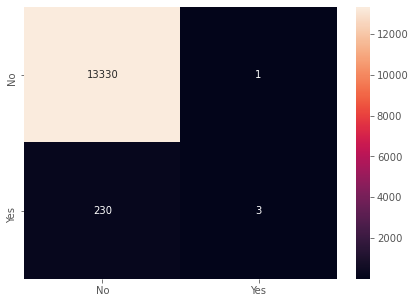

In [69]:
print(dTreeR.score(X_test , y_test))
y_predict = dTreeR.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

### The confusion matrix = [[13330, 1], [ 230, 3]]
### TP = 13330 FP = 1 FN = 230 TN = 3


In [72]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

from sklearn.tree import DecisionTreeClassifier

ModuleNotFoundError: No module named 'graphviz'

In [73]:
#BankData_Tree_File = open('bankdatadf.dot','w')    ## Creating the dot file for generating the Decision Tree diagram
#export_graphviz(dTreeR, out_file=BankData_Tree_File,   filled=True, rounded=True, special_characters=True,feature_names = filtered_columns)
#BankData_Tree_File.close()

In [74]:
#import os
#retCode = os.system("dot -Tpng bankdatadf.dot -o bankdatadf.png")
#if(retCode>0):
#    print("system command returning error: "+str(retCode))
#else:
#    display(Image("bankdatadf.png"))

In [75]:
print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train.columns))   ## The feature importance matrix for the Decision Tree  

                     Imp
age                 0.05
balance             0.88
housing             0.04
loan                0.03
day                 0.00
duration            0.00
campaign            0.00
pdays               0.00
previous            0.00
Target              0.00
job_admin.          0.00
job_blue-collar     0.00
job_entrepreneur    0.00
job_housemaid       0.00
job_management      0.00
job_retired         0.00
job_self-employed   0.00
job_services        0.00
job_student         0.00
job_technician      0.00
job_unemployed      0.00
job_unknown         0.00
marital_divorced    0.00
marital_married     0.00
marital_single      0.00
education_primary   0.00
education_secondary 0.00
education_tertiary  0.00
education_unknown   0.00
contact_cellular    0.00
contact_telephone   0.00
contact_unknown     0.00
month_apr           0.00
month_aug           0.00
month_dec           0.00
month_feb           0.00
month_jan           0.00
month_jul           0.00
month_jun           0.00


## Random Forest Prediction

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
randomClassifier = RandomForestClassifier(n_estimators=50, random_state=40)
randomClassifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=40, verbose=0,
                       warm_start=False)

In [78]:
y_predict = randomClassifier.predict(X_test)
randomClassifier.score(X_test, y_test)

0.9827484517841345

## Ensemble Learning - Bagging

In [79]:
from sklearn.ensemble import BaggingClassifier

In [80]:
baggingClassifier = BaggingClassifier(base_estimator=dTreeR, n_estimators=50, random_state=40)
baggingClassifier.fit(X_train, y_train)
y_predict = baggingClassifier.predict(X_test)
baggingClassifier.score(X_test, y_test)

0.9828959009141847

## Ensemble Learning - Boosting (Ada)

In [81]:
from sklearn.ensemble import AdaBoostClassifier

In [82]:
# adaClassifier = AdaBoostClassifier(base_estimator=dTree, n_estimators=50, random_state=40)  With base estimator 'dTree' the score was 0.8782070185785904
adaClassifier = AdaBoostClassifier(n_estimators=50, random_state=40)    ## Tried to see if without estimator if the performance metrics change. New value is 0.897670303745208
adaClassifier.fit(X_train, y_train)
y_predict = adaClassifier.predict(X_test)
adaClassifier.score(X_test, y_test)

0.9823798289590091